## Condensed version for parsing a single defect:

In [1]:
from doped import dope_stuff
from doped.pycdt.utils import parse_calculations
import numpy as np
import os

bulk_file_path = "Bulk_Supercell/vasp_ncl" # path to bulk supercell
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]]) # dielectric tensor

defect_file_path = f"Defect/vasp_ncl" # path to final defect calc folder
defect_charge = -2 # defect charge

sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                    dielectric, defect_charge,
                                    #initial_defect_structure=f"{i}/vasp_gam/POSCAR" # may need to specify this if the defect moved a lot and PyCDT has trouble identifying it
                                                      )
print("Uncorrected energy: {}".format(sdp.defect_entry))
bo = sdp.freysoldt_loader()
sdp.get_stdrd_metadata()
sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path=None)
sdp.run_compatibility()
print("Defect entry corrections:")
print(sdp.defect_entry.corrections)
print(f"Corrected energy: {sdp.defect_entry.energy} eV")
defect_entry = sdp.defect_entry # Can inspect this to see all the parsed info etc

For many defect calculations (usually the case), will want to do something like in the next few cells, where we loop over the calculation directories and save the results to a dictionary. This can then be save to a pickle file so we can restart the notebook later and not have to re-parse all the calculations.

## Some Defect Calculation results for $V_{Cd}$

In this example, `vac_1_Cd_0` wasn't generated with `doped`, and so the defect site is not the `doped`-generated one (0,0,0), but (0.5, 0.5, 0.5). Often `doped` can parse the defect fine, automatically determining the defect type and site from the relaxed structure.

However, sometimes it needs a little help (if the defect undergoes significant relaxation for example). This is why we have the `vasp_input.prepare_vasp_defect_dict()` function, to generate `transformation.json` files so that `doped` always knows what type of defect is present. In this case, we don't have (initially) have a `transformation.json` file because we didn't generate the defect with `doped`, but what we _can_ do is get a `transformation.json` file from a different defect (that we have generated with `doped`), and modify to give the correct info for `vac_1_Cd_0` (i.e. defect charge, initial site etc.). That's what we've done here.

In [1]:
from doped import dope_stuff

In [2]:
from doped.pycdt.utils import parse_calculations
import numpy as np
import os

In [345]:
bulk_file_path = "Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])
parsed_vac_Cd_dict = {}

for i in os.listdir():
    if 'vac_1_Cd' in i:
        print("\n",i)
        defect_file_path = f"{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_",""))

        # Note that we've added the optional argument initial_defect_structure to 
        # SingleDefectParser.from_paths() in case PyCDT has trouble finding defect site
        # i.e. use the unrelaxed, PyCDT generated POSCAR in the local defect folder
        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge,
                                            initial_defect_structure=f"{i}/vasp_gam/POSCAR")
        print("Uncorrected energy: {}".format(sdp.defect_entry))
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()

# We've also added actual_bulk optional argument to pycdt.utils.parse_calculations.SingleDefectParser.get_bulk_gap_data(), in case we're
# looking at defect complexes (so the SingleDefectParser 'bulk' is actually the original point defect, with the wrong pmg-computed gap)
        sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path=None)
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy} eV")
        parsed_vac_Cd_dict[i] = sdp.defect_entry # Keep dictionary of parsed defect entries
# Note that the PyCDT/pymatgen kumagai correction scheme uses the atomic core potentials from the OUTCAR (which aren't printed
# if we set ICORELEVEL), so we ain't using that in this case. #itiswhatitis


 vac_1_Cd_-2
Uncorrected energy: DefectEntry None - Vac_Cd_mult32 - charge -2
Energy = 7.6608
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/vasp_ncl
	defect_path = vac_1_Cd_-2/vasp_ncl
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
Single mp-id found for bulk structure:mp-406.
Reverting to use of bulk supercell calculation for band edge extrema.
Mpid mp-406 was provided, but we've decided to say:
'Thanks, but no thanks' to the Materials Project.
Reverting to use of bulk supercell calculation for band edge extrema.
Defect entry corrections:
{'charge_correction': 0.7376460317828045, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 8.398484221782825 eV

 vac_1_Cd_0
Uncorrected energy: DefectEntry None - Vac_Cd_mult32 - charge 0
Energy = 4.6824
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/vasp_ncl
	defect_path = vac_1_Cd_0/vasp_ncl
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0

In [62]:
bulk_file_path = "Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])
parsed_vac_Cd_dict = {}

for i in os.listdir():
    if 'vac_1_Cd_1' in i:
        print("\n",i)
        defect_file_path = f"{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_",""))
        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge)
        print("Uncorrected energy: {}".format(sdp.defect_entry))
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path=None)
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy} eV")
        parsed_vac_Cd_dict[i] = sdp.defect_entry


 vac_1_Cd_1
Uncorrected energy: DefectEntry None - Vac_Cd_mult32 - charge 1
Energy = 3.2425
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/vasp_ncl
	defect_path = vac_1_Cd_1/vasp_ncl
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
Single mp-id found for bulk structure:mp-406.
Reverting to use of bulk supercell calculation for band edge extrema.
Mpid mp-406 was provided, but we've decided to say:
'Thanks, but no thanks' to the Materials Project.
Reverting to use of bulk supercell calculation for band edge extrema.
Defect entry corrections:
{'charge_correction': 0.05155697496411549, 'bandfilling_correction': -0.18376801255382666, 'bandedgeshifting_correction': 0.0}
Corrected energy: 3.110333182410302 eV


In [346]:
parsed_vac_Cd_dict['vac_1_Cd_0'].site

PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]

**Verifying unstable $T_d$ $V_{Cd}^{-1}$:**

In [4]:
from doped.pycdt.utils import parse_calculations
import numpy as np

In [9]:
bulk_file_path = "Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0],[0., 9.13, 0],[0, 0, 9.13]])
vac_1_Cd_vgam_dict = {}

for i in os.listdir():
    if 'vac_1_Cd_-1' in i:
        print("\n",i)
        defect_file_path = f"{i}/vasp_gam"
        defect_charge = int(i[-2:].replace("_",""))
        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge,
                                            initial_defect_structure=f"{i}/vasp_gam/POSCAR")
        print("Uncorrected energy: {}".format(sdp.defect_entry))
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path=None)
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy} eV")
        vac_1_Cd_vgam_dict["-1_C3v"] = sdp.defect_entry
        
        print("\n",i)
        defect_file_path = f"{i}/Td_sym_vasp_gam"
        defect_charge = int(i[-2:].replace("_",""))
        sdp = parse_calculations.SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                            dielectric, defect_charge,
                                            initial_defect_structure=f"{i}/vasp_gam/POSCAR")
        print("Uncorrected energy: {}".format(sdp.defect_entry))
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path=None)
        sdp.run_compatibility()
        print("Defect entry corrections:")
        print(sdp.defect_entry.corrections)
        print(f"Corrected energy: {sdp.defect_entry.energy} eV")
        vac_1_Cd_vgam_dict["-1_Td"] = sdp.defect_entry


 vac_1_Cd_-1
Uncorrected energy: DefectEntry None - Vac_Cd_mult32 - charge -1
Energy = 11.2396
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/vasp_ncl
	defect_path = vac_1_Cd_-1/vasp_gam
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
Manually fed mpid = None
Note that it would be better to perform real band structure calculation...
Defect entry corrections:
{'charge_correction': 0.23206376535223944, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 11.471684855352253 eV

 vac_1_Cd_-1
No transformation file exists at vac_1_Cd_-1/Td_sym_vasp_gam/transformation.json.
Calculating defect index manually (proceed with caution)
Uncorrected energy: DefectEntry None - Vac_Cd_mult32 - charge -1
Energy = 11.3186
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/vasp_ncl
	defect_path = vac_1_Cd_-1/Td_sym_vasp_gam
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
Manually fe

/Users/kavanase/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Delocalization analysis has indicated that Vac_Cd_mult32 with charge -1 may not be compatible with the chosen charge correction scheme, and may require a larger supercell for accurate calculation of the energy. Recommended to look at the correction plots (i.e. run `get_correction_freysoldt(DefectEntry,...,plot=True)` from `DefectsWithTheBoys.pycdt.corrections.finite_size_charge_correction` to visually determine if charge correction scheme still appropriate.


In [10]:
from doped.pycdt.corrections.finite_size_charge_correction import get_correction_freysoldt

Final Freysoldt correction is -0.31133855462593796


-0.31133855462593796

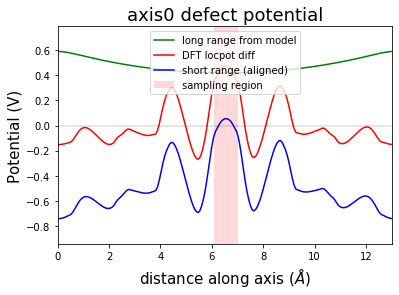

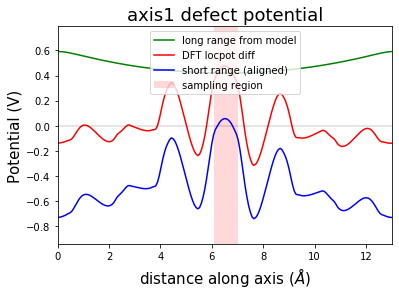

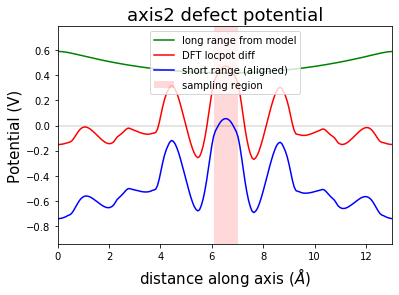

In [12]:
get_correction_freysoldt(vac_1_Cd_vgam_dict["-1_Td"], dielectric, plot = True)

Yep, looks like it's unstable (by about 80 meV).

Can save python objects using `dope_stuff.save_to_pickle`, then reload them later with `dope_stuff.load_from_pickle`, so we can restart the Python kernel and not have to re-parse everything.

In [2]:
cdte_chempots = dope_stuff.load_from_pickle('Pickled_stuff/cdte_chempot_limits.pickle')

In [3]:
parsed_vac_Cd_dict = dope_stuff.load_from_pickle('Pickled_stuff/parsed_vac_Cd_dict.pickle')

In [4]:
vac_Cd_dpd = dope_stuff.load_from_pickle('vac_Cd_dpd.pickle')

In [8]:
parsed_CdTe_defects_dict = dope_stuff.load_from_pickle('Pickled_stuff/parsed_CdTe_defects_dict.pickle')

In [9]:
parsed_CdTe_defects_dict.update(parsed_vac_Cd_dict)

In [10]:
dope_stuff.save_to_pickle(parsed_CdTe_defects_dict, 'Pickled_stuff/parsed_CdTe_defects_dict.pickle')

## The Main Event: Transition Level Diagrams

In [110]:
vac_Cd_defects_dict = dope_stuff.load_from_pickle("Pickled_Shit/parsed_vac_Cd_dict.pickle") # Frey corrected

In [111]:
lz_corrected_vac_Cd_dict = dope_stuff.lany_zunger_corrected_defect_dict_from_freysoldt(vac_Cd_defects_dict)

In [112]:
lz_corrected_vac_Cd_dpd = dope_stuff.dpd_from_parsed_defect_dict(lz_corrected_vac_Cd_dict)

In [113]:
import copy
adjusted_lz_vac_Cd_dict = copy.deepcopy(lz_corrected_vac_Cd_dict)
adjusted_lz_vac_Cd_dict.pop("vac_1_Cd_1");
adjusted_lz_vac_Cd_dpd = dope_stuff.dpd_from_parsed_defect_dict(adjusted_lz_vac_Cd_dict)

In [114]:
vac_Cd_dpd = dope_stuff.dpd_from_parsed_defect_dict(vac_Cd_defects_dict)
dope_stuff.save_to_pickle(vac_Cd_dpd, "Pickled_Shit/vac_Cd_dpd.pickle")
vac_Cd_dpd = dope_stuff.load_from_pickle("Pickled_Shit/vac_Cd_dpd.pickle")

In [17]:
cdte_chempots = dope_stuff.load_from_pickle("Pickled_Shit/cdte_chempot_limits.pickle")

NameError: name 'dope_stuff' is not defined

Add manual chempots example

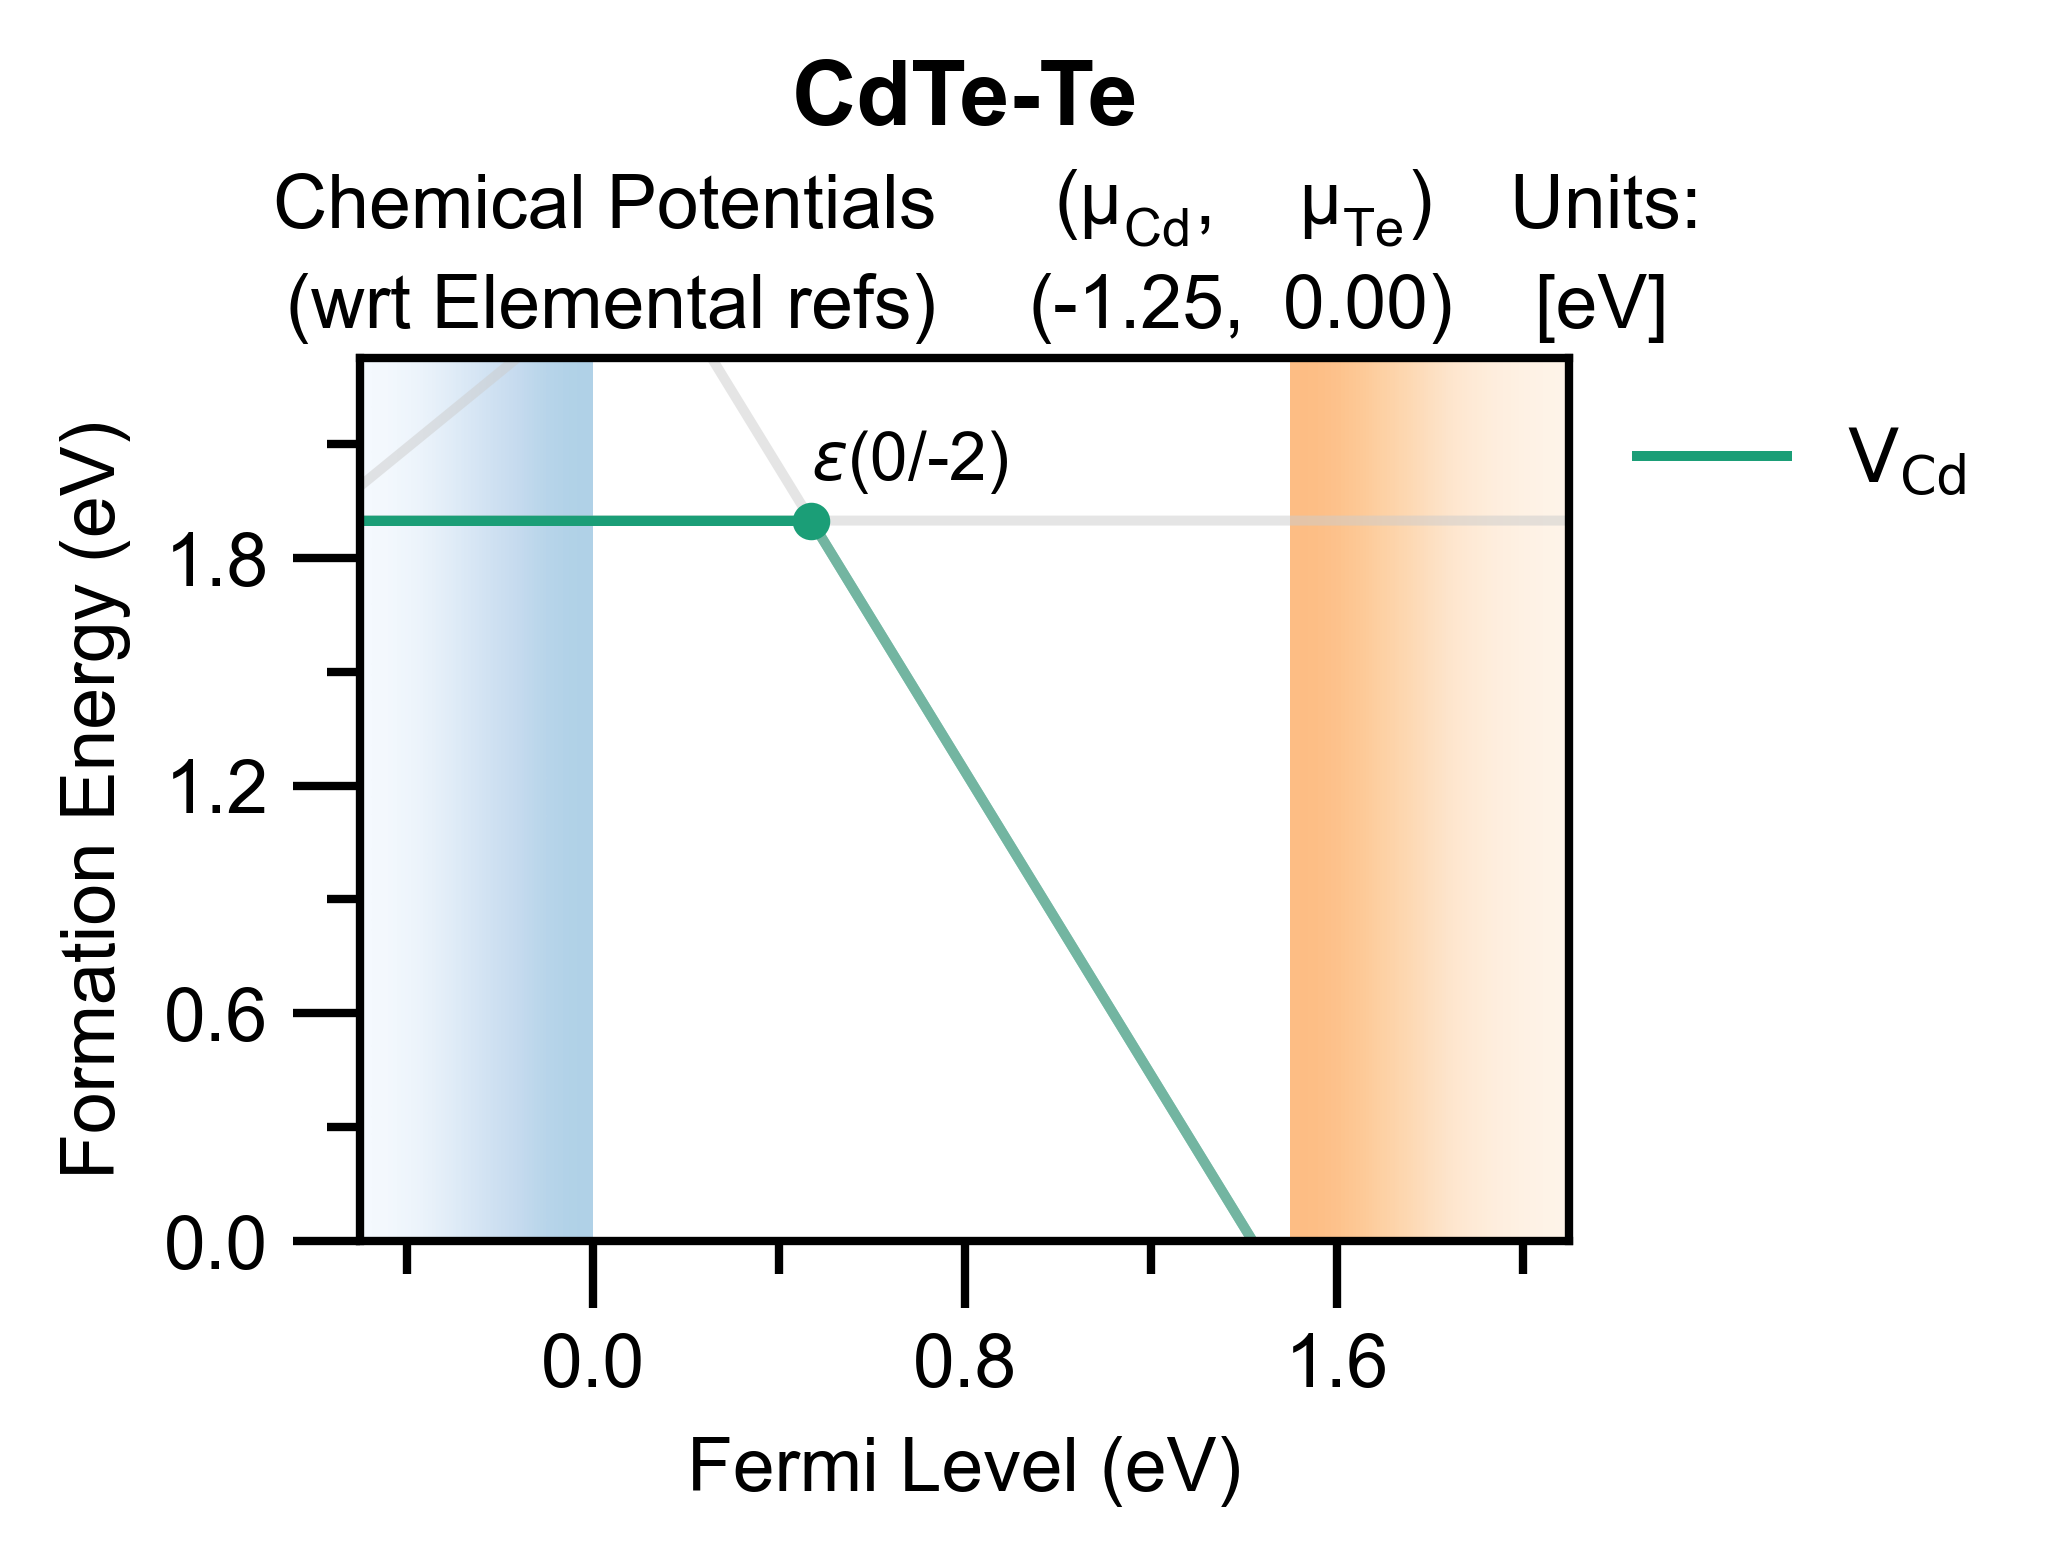

In [39]:
def_plot = dope_stuff.formation_energy_plot(
    vac_Cd_dpd,
    cdte_chempots,
    auto_labels=True,
    xlim=(-0.5, 2.1),
    emphasis=True,
    pd_facets=["CdTe-Te"],
    filename="V_Cd_Frey_Te-Rich.pdf"
)

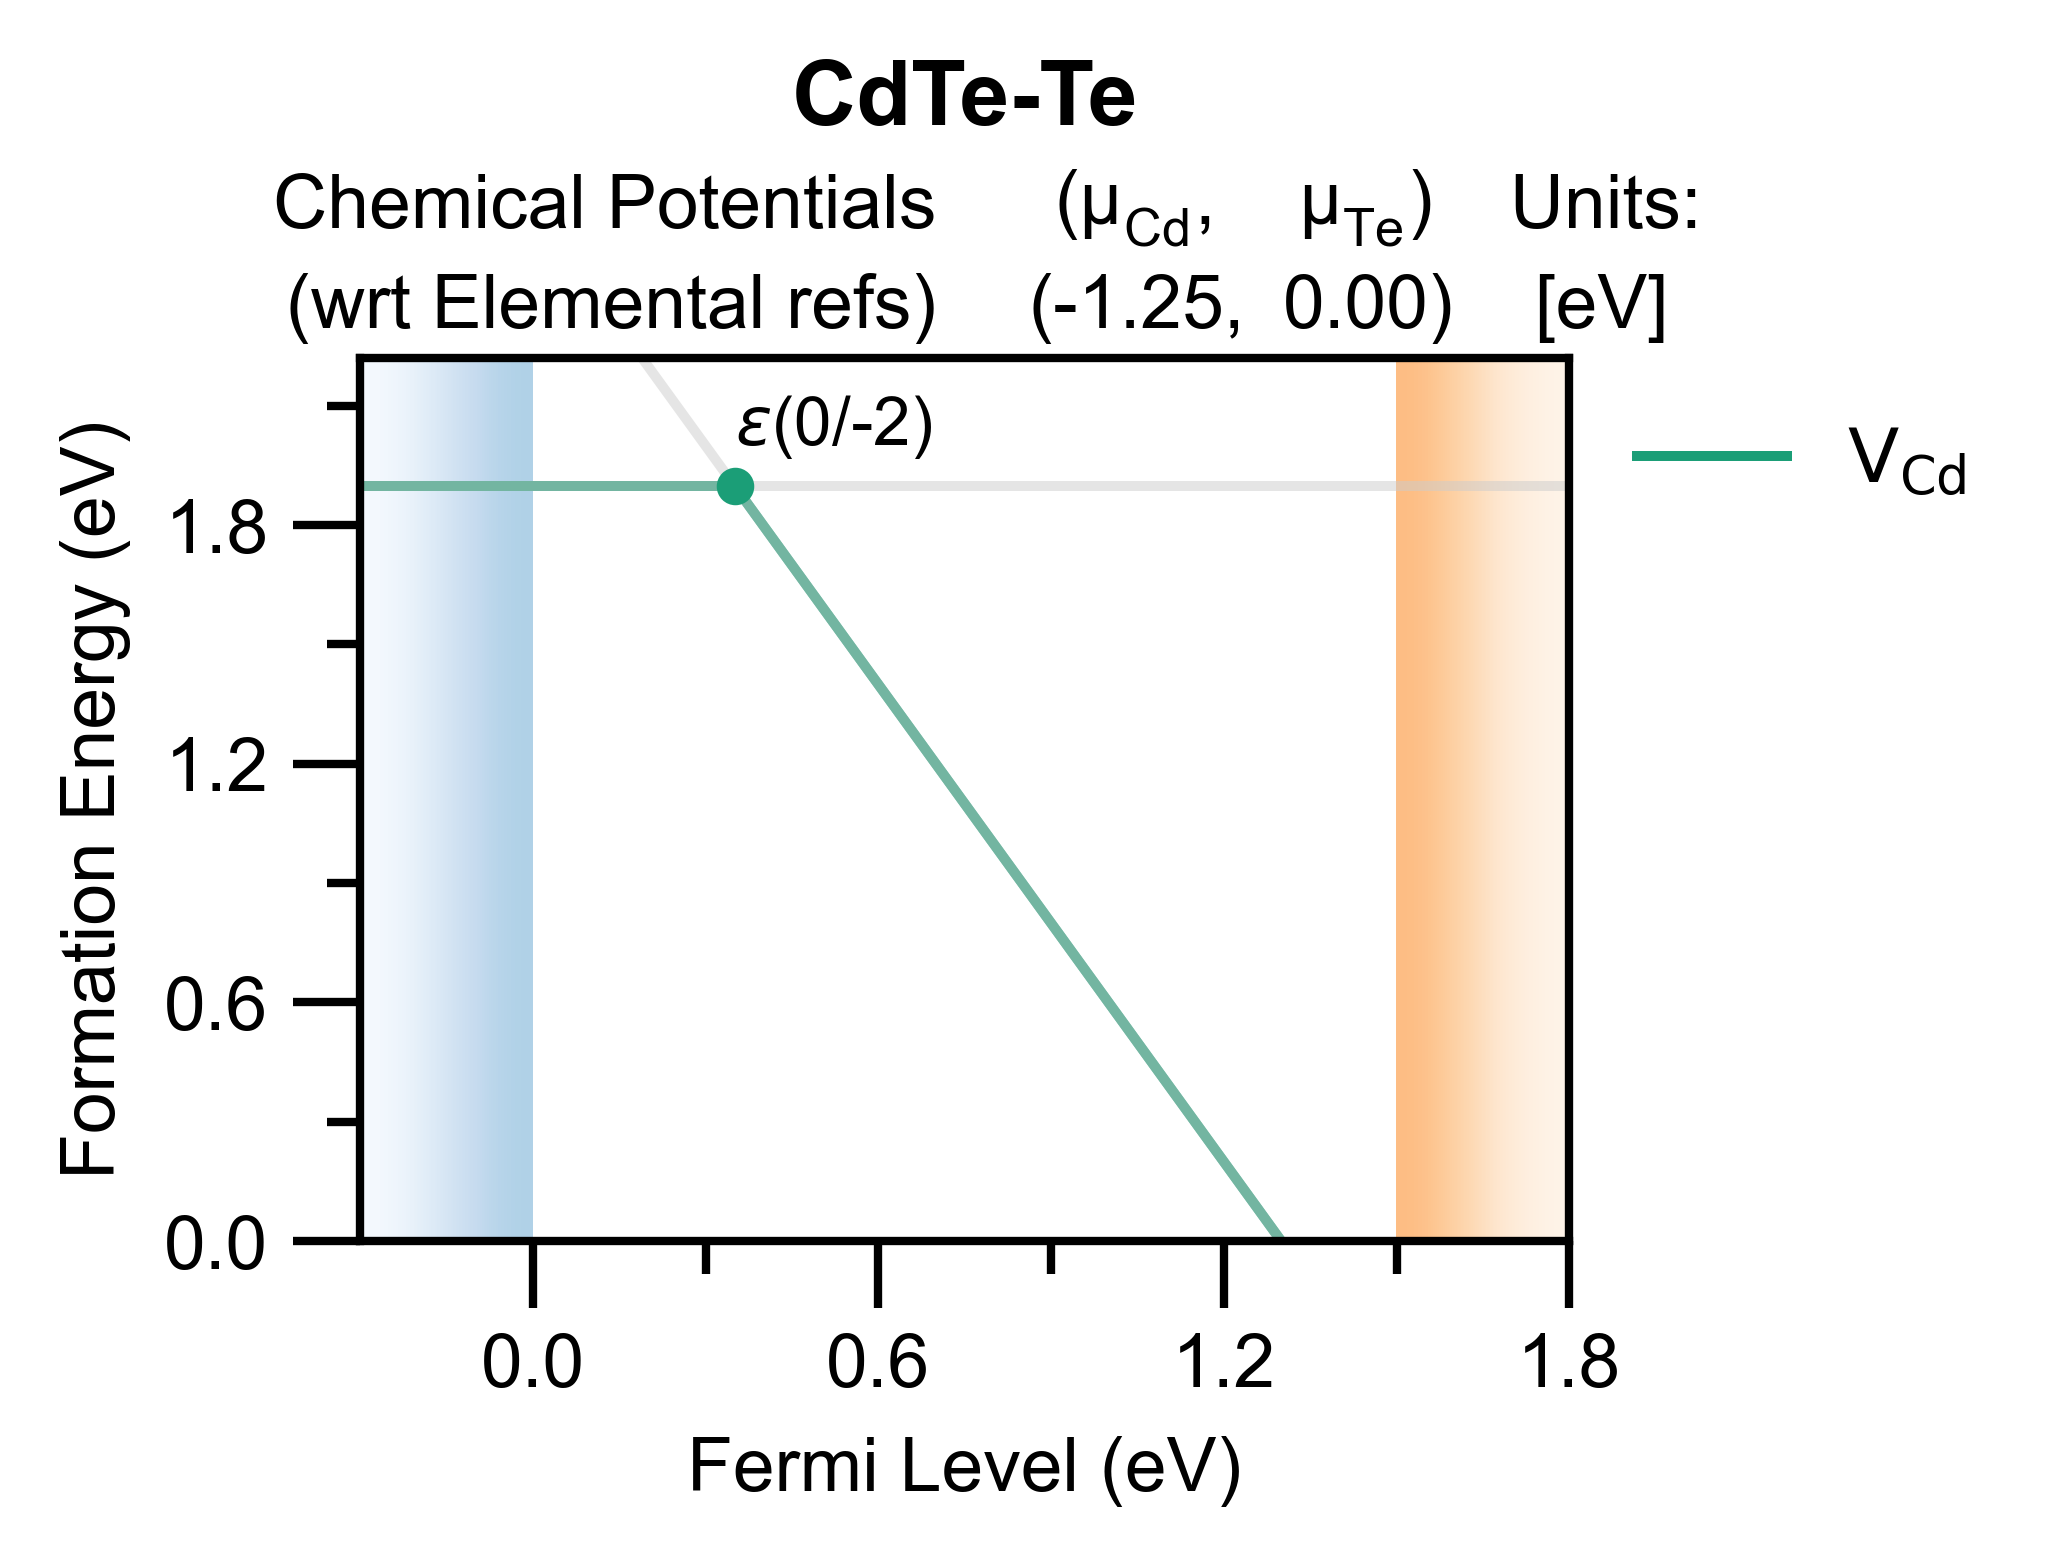

In [40]:
lzdef_plot = dope_stuff.formation_energy_plot(
    adjusted_lz_vac_Cd_dpd,
    cdte_chempots,
    auto_labels=True,
    xlim=(-0.3, 1.8),
    emphasis=True,
    pd_facets=["CdTe-Te"],
    filename="V_Cd_LZ_Te-Rich.pdf"
)

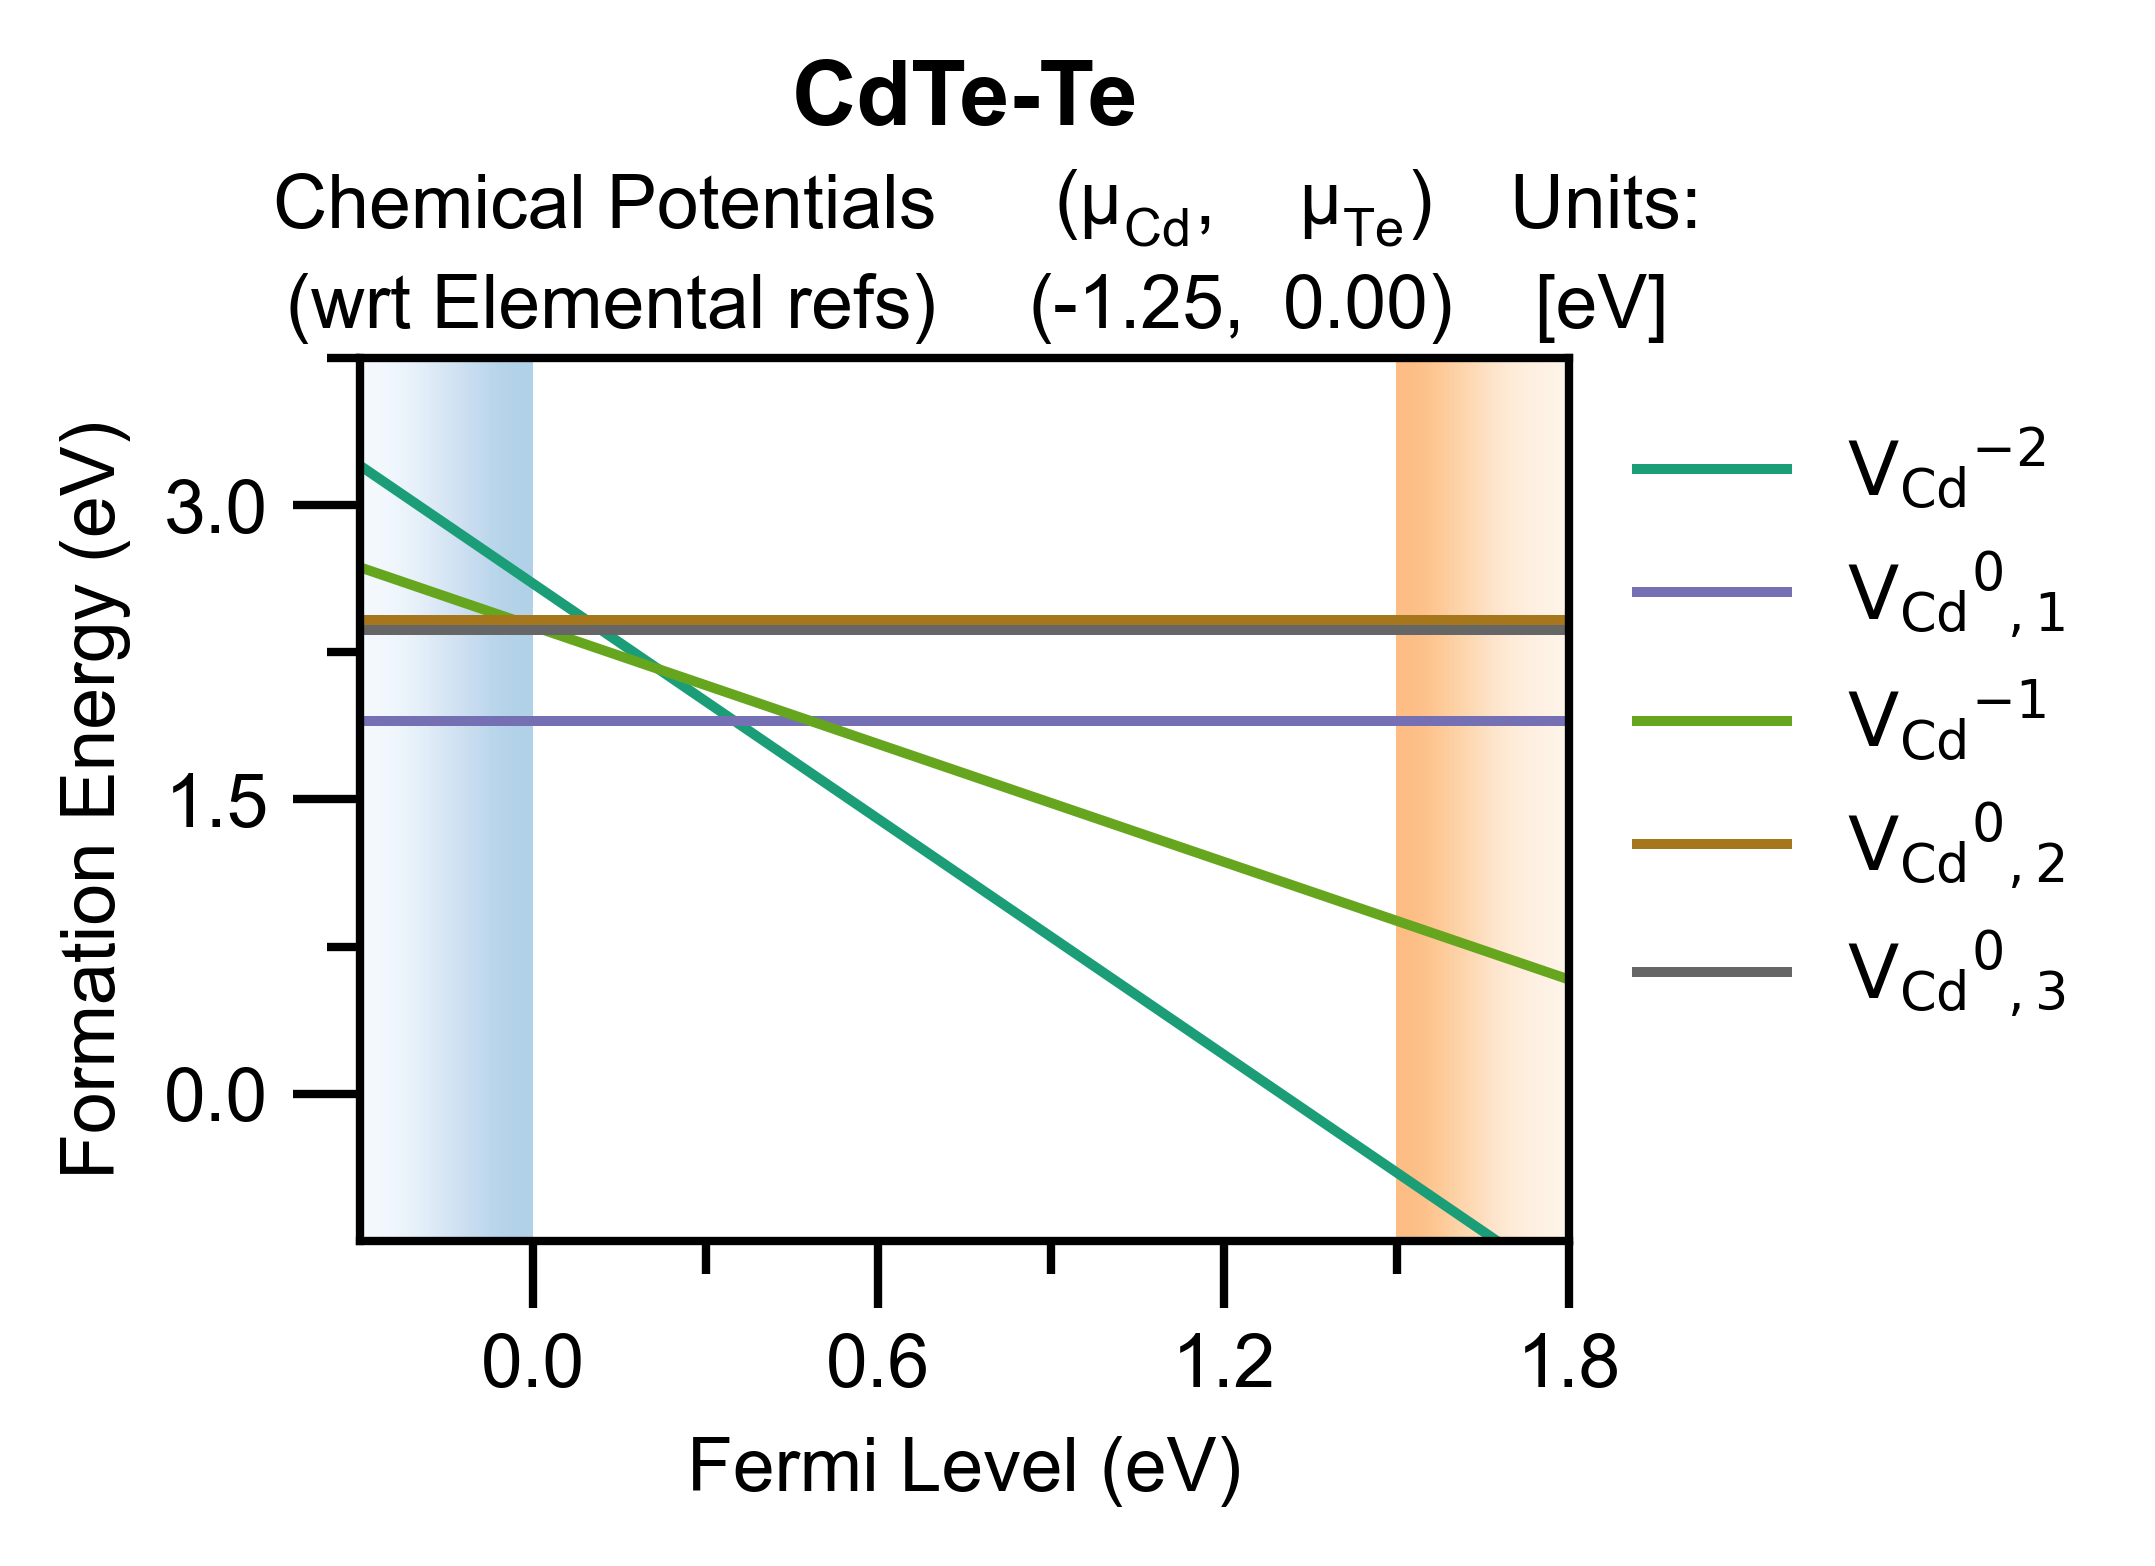

In [42]:
def_plot = dope_stuff.all_lines_formation_energy_plot(
    adjusted_lz_vac_Cd_dpd,
    cdte_chempots,
    auto_labels=False,
    xlim=(-0.3, 1.8),
    ylim=(-0.75,3.75),
    pd_facets=["CdTe-Te"],
    filename="V_Cd_LZ_Te-Rich_All_Lines.pdf"
)

# $V_{Cd}^{0}$ Concentrations

In [66]:
lz_Cd_defects_dpd = dope_stuff.load_from_pickle("Pickled_stuff/lz_CdTe_defects_dpd.pickle")

In [67]:
cdte_chempots = dope_stuff.load_from_pickle("Pickled_stuff/cdte_chempot_limits.pickle")

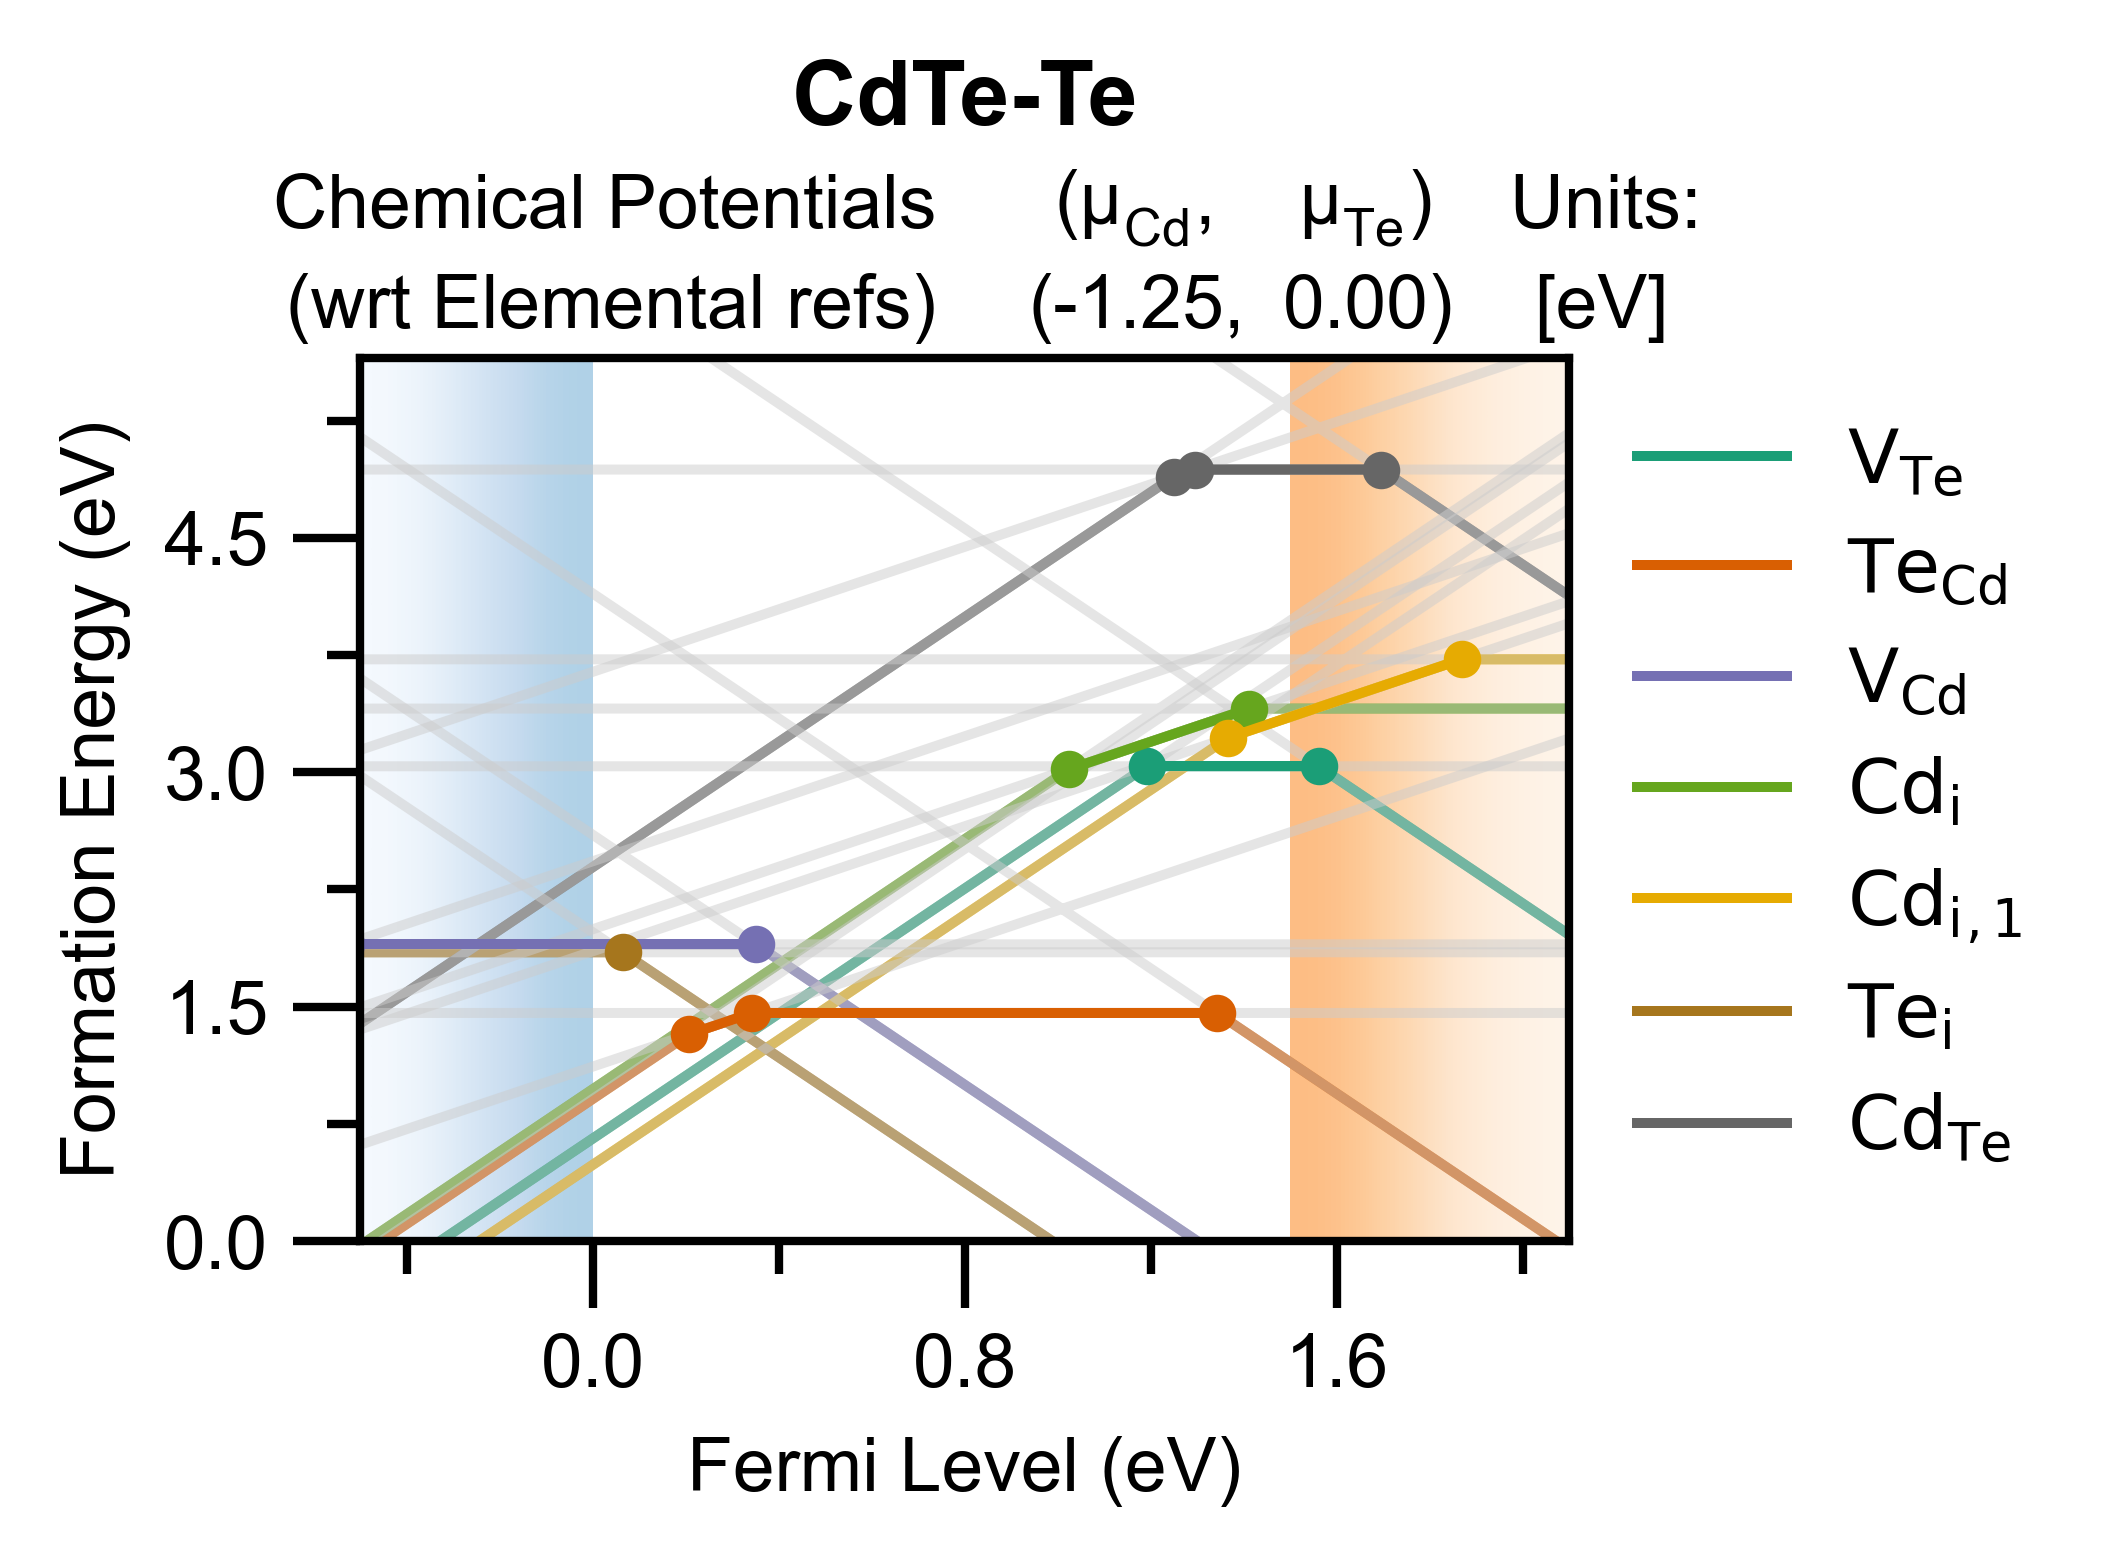

In [21]:
def_plot = dope_stuff.formation_energy_plot(
    lz_Cd_defects_dpd,
    cdte_chempots,
    #auto_labels=True,
    xlim=(-0.5, 2.1),
    emphasis=True,
    pd_facets=["CdTe-Te"],
)

In [76]:
[defect.energy for defect in lz_Cd_defects_dpd.entries if defect.name == "Vac_Cd_mult32"]

[8.159487929384449,
 4.165717260000008,
 6.295109020833332,
 3.050583859310708,
 4.682410190000013]

In [77]:
vac_Cd_0_sorted = sorted([defect for defect in lz_Cd_defects_dpd.entries if defect.name == "Vac_Cd_mult32" and defect.charge == 0], key=lambda x: x.energy)
vac_Cd_0_Te_dimer = vac_Cd_0_sorted[0]

In [78]:
def_energy = lambda x: x.energy
def_energy(vac_Cd_0_sorted[0])

4.165717260000008

In [47]:
print(f"V_Cd^0 concentration in p-type CdTe at T=1000K: {vac_Cd_0_Te_dimer.defect_concentration(cdte_chempots['facets']['CdTe-Te'], temperature=1000, fermi_level = 0.3):.2E} cm^3")

V_Cd^0 concentration in p-type CdTe at T=1000K: 3.86E+12 cm^3


In [46]:
print(f"V_Cd^0 formation energy in p-type CdTe: {vac_Cd_0_Te_dimer.formation_energy(cdte_chempots['facets']['CdTe-Te'], fermi_level = 0.3):.3f} eV")

V_Cd^0 formation energy in p-type CdTe: 1.899 eV


In [70]:
from doped.pycdt.utils.parse_calculations import get_vasprun

In [71]:
CdTe_dos_vr = get_vasprun("prim_cell_DOS/vasprun.xml.gz")

In [75]:
T = 273.15 + 750 # 750 degrees C
lz_Cd_defects_dpd.solve_for_fermi_energy(T, cdte_chempots["facets"]["CdTe-Te"], CdTe_dos_vr.complete_dos)

0.5158090324034222

In [79]:
print(f"V_Cd^0 concentration in p-type CdTe at T=1000K: {vac_Cd_0_Te_dimer.defect_concentration(cdte_chempots['facets']['CdTe-Te'], temperature=T, fermi_level = 0.5158):.2E} cm^3")

V_Cd^0 concentration in p-type CdTe at T=1000K: 6.35E+12 cm^3
